## Introduction to ANN - Exercise
---
Instructions are given in <span style="color:blue">blue</span> color.

##### Created by:
##### Tomislav Tomov 6003618
##### Ioana Stoicescu 6003487

In this exercise you should perform a classification task with ANNs very similar to the material notebook, but on a new, and *more challenging* dataset.

### The Street View House Numbers (SVHN) Dataset
This [dataset](http://ufldl.stanford.edu/housenumbers/) contains over 600,000 images of house numbers from Google Street View images. It can be used for object detection and classification tasks. In this task you should perform a classification, very similar to the material notebook. The authors of this dataset have cut out 32x32 pixel images to focus on single house numbers. Nevertheless, this introduces some distracting digits to the sides of the digit of interest, which makes this dataset a lot more challenging than [mnist](http://yann.lecun.com/exdb/mnist/).

We can load the dataset very conveniently from [openml](https://www.openml.org/) with the [fetch_openml](https://www.openml.org/search?type=data&status=active&id=42141) with the [fetch_openml](https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.fetch_openml.html) function from `scikit-learn`:

In [2]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [3]:
from sklearn.datasets import fetch_openml
svhn = fetch_openml(data_id=42141)

**Note:** we actually use a [subset](https://www.openml.org/search?type=data&status=active&id=42141) of the original dataset (*SVHN_medium*) by Joquin Vanschoren, because the original dataset would be too large for an exercise.

In [4]:
svhn.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
svhn.data.head(5)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,pixel3072
0,31.0,29.0,42.0,31.0,29.0,43.0,31.0,29.0,43.0,31.0,...,41.0,31.0,38.0,41.0,30.0,37.0,41.0,31.0,36.0,40.0
1,123.0,128.0,142.0,129.0,134.0,148.0,146.0,153.0,166.0,168.0,...,195.0,182.0,188.0,197.0,185.0,192.0,200.0,185.0,193.0,200.0
2,101.0,86.0,122.0,84.0,72.0,110.0,70.0,60.0,101.0,68.0,...,88.0,57.0,55.0,91.0,67.0,60.0,93.0,76.0,64.0,94.0
3,124.0,127.0,132.0,125.0,129.0,132.0,126.0,130.0,132.0,124.0,...,138.0,124.0,127.0,136.0,120.0,123.0,133.0,114.0,116.0,128.0
4,187.0,192.0,195.0,201.0,206.0,209.0,214.0,220.0,222.0,223.0,...,109.0,97.0,79.0,105.0,89.0,67.0,93.0,81.0,57.0,81.0


In this dataset we have 49,644 images with 32x32x3 pixel values per image:

In [6]:
svhn.data.shape

(49644, 3072)

Split the data into feature matrix and target vector:

In [7]:
X,y = svhn.data, svhn.target.astype(int)

You can use the following train-test split for your experiments:

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.to_numpy(), test_size=0.2, stratify=y, random_state=42)

* <div style="color:blue">Let's get started with a little visualization task by displaying the 10th image of each class present.</div>

**Hints**:
* This dataset has different classes than mnist. Check `y`!
* You have an additional color channel.
* For `imshow` you might need to convert your data to `int`.


[ 1  2  3  4  5  6  7  8  9 10]


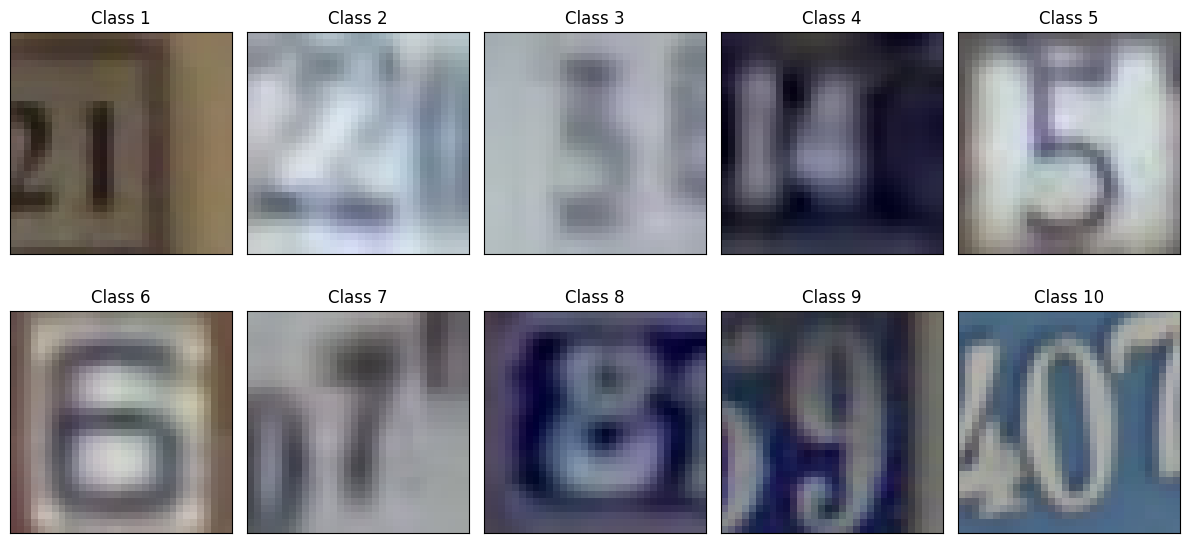

In [12]:
print(np.unique(y_train))

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 6), sharex=True, sharey=True)
ax = ax.flatten()

for i, label in enumerate(sorted(np.unique(y_train))): 
    # indices of images belonging to the current class
    class_indices = np.where(y_train == label)[0]
    
    if len(class_indices) > 10:  # ensure there are at least 10 images for the class
        img_idx = class_indices[10]  # 10th image
        img = X_train[img_idx].reshape(32, 32, 3).astype(np.uint8)  # reshape and convert to uint8
        ax[i].imshow(img)  # display the image
        ax[i].set_title(f"Class {label}")
    else:
        ax[i].axis('off')  # if fewer than 10 images, leave the plot blank

# Remove axis ticks for better visualization
for a in ax:
    a.set_xticks([])
    a.set_yticks([])

plt.tight_layout()
# plt.savefig('./Images/mnist_all.png', dpi=300)
plt.show()

* <div style="color:blue">Now lets train an MLP model on this dataset! Use the same configuration that was used for mnist in the material notebook.</div>
* <div style="color:blue">This dataset is much larger and will take a lot longer to train. Use a <b>lower iteration value</b> (~30)!</div>
* <div style="color:blue">Interpret the results with regards to the <b>null-accuracy</b>.</div>

In [13]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(50,50),
                   activation='logistic',
                   solver='sgd',
                   alpha=0.001,
                   batch_size=50,
                   learning_rate='constant',
                   learning_rate_init=0.001,
                   max_iter=30, # initially 1000
                   verbose=False, # set to True to follow live
                   random_state=1)
start = dt.datetime.now()
print(f'Starting training the model at {start:%H:%M:%S}')
nn.fit(X_train, y_train)
end = dt.datetime.now()
print(f'Done training the model at {end:%H:%M:%S}')


Starting training the model at 13:16:45
Done training the model at 13:18:34


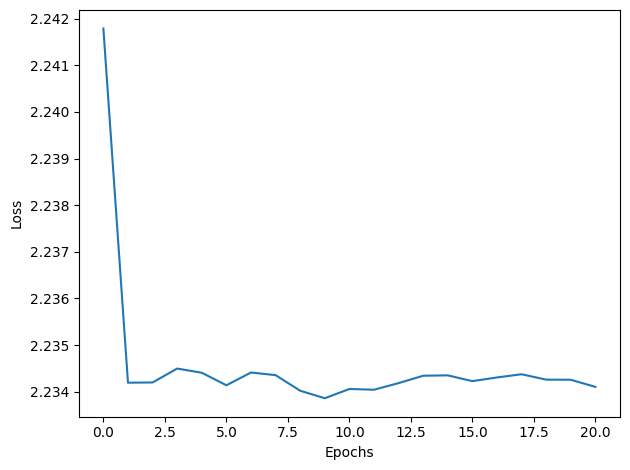

In [14]:
loss_values = nn.loss_curve_
import matplotlib.pyplot as plt
plt.plot(range(len(loss_values)), loss_values)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

<div style="color:blue">Next up you should try if a more 'aggressive' model configuration could improve the training.</div>

* Change the following parameters:
    * Increase the L2 regularization to `0.05`
    * Increase the batchsize to `512`
    * Increase the initial learning rate to `0.075`
* <div style="color:blue">Repeat the training with the new configuration. Interpret your results.</div>

**Hint:** Check the [documentation](https://scikit-learn.org/dev/modules/generated/sklearn.neural_network.MLPClassifier.html) for the MLPClassifier, if you are not sure on the parameters.

In [16]:
nn = MLPClassifier(hidden_layer_sizes=(50,50),
                   activation='logistic',
                   solver='sgd',
                   alpha=0.05, # L2
                   batch_size=512,
                   learning_rate='constant',
                   learning_rate_init=0.075,
                   max_iter=30, # initially 1000
                   verbose=False, # set to True to follow live
                   random_state=1)
start = dt.datetime.now()
print(f'Starting training the model at {start:%H:%M:%S}')
nn.fit(X_train, y_train)
end = dt.datetime.now()
print(f'Done training the model at {end:%H:%M:%S}')

Starting training the model at 13:22:21
Done training the model at 13:23:04


d:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


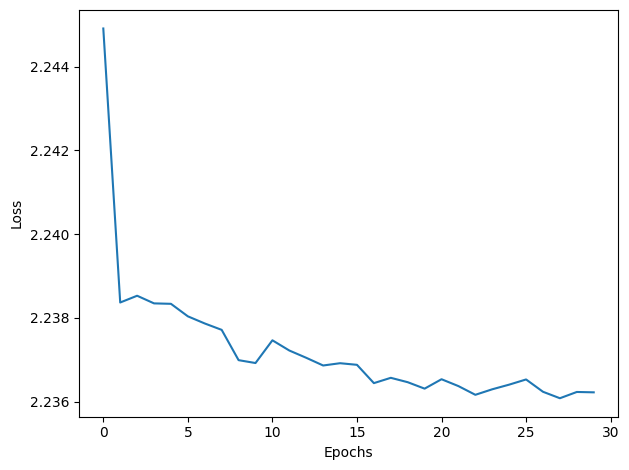

In [19]:
loss_values = nn.loss_curve_
import matplotlib.pyplot as plt
plt.plot(range(len(loss_values)), loss_values)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

The material notebook mentions, that data could be **scaled** before beeing used as an input for ANNs. Maybe this will help the model to train?
* <div style="color:blue">Scale the data to numbers between <code>[0,1]</code>.</div>
* <div style="color:blue">Repeat the training with the more aggressive model with the scaled data.</div>
* <div style="color:blue">Interpret the results.</div>

In [ ]:
from sklearn.metrics import accuracy_score

print("Fetching SVHN dataset...")
svhn = fetch_openml(data_id=42141) 
X, y = svhn.data, svhn.target.astype(int)
# data before scaling
print(f"Data range before scaling: Min={X.min()}, Max={X.max()}")
# data scaling
X = X / 255.0
print(f"Data range after scaling: Min={X.min()}, Max={X.max()}")
X_train, X_test, y_train, y_test = train_test_split(
    X.values, y.to_numpy(), test_size=0.2, stratify=y, random_state=42
)
nn = MLPClassifier(
    hidden_layer_sizes=(100, 100),
    activation='tanh',      
    solver='sgd',           # SGD for more control
    alpha=0.0001,
    batch_size=64,
    learning_rate='adaptive',  # adaptive learning rate for SGD, really nice feature
    learning_rate_init=0.01,
    max_iter=200,
    verbose=True,
    random_state=42
)
start = dt.datetime.now()
print(f"Starting training the model at {start:%H:%M:%S}")
nn.fit(X_train, y_train)
end = dt.datetime.now()
print(f"Done training the model at {end:%H:%M:%S}")

# evaluate the model
y_pred = nn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.4f}")

Fetching SVHN dataset...
Data range before scaling: Min=pixel1       0.0
pixel2       0.0
pixel3       0.0
pixel4       0.0
pixel5       0.0
            ... 
pixel3068    0.0
pixel3069    0.0
pixel3070    0.0
pixel3071    0.0
pixel3072    0.0
Length: 3072, dtype: float64, Max=pixel1       255.0
pixel2       255.0
pixel3       255.0
pixel4       255.0
pixel5       255.0
             ...  
pixel3068    255.0
pixel3069    255.0
pixel3070    255.0
pixel3071    255.0
pixel3072    255.0
Length: 3072, dtype: float64
Data range after scaling: Min=pixel1       0.0
pixel2       0.0
pixel3       0.0
pixel4       0.0
pixel5       0.0
            ... 
pixel3068    0.0
pixel3069    0.0
pixel3070    0.0
pixel3071    0.0
pixel3072    0.0
Length: 3072, dtype: float64, Max=pixel1       1.0
pixel2       1.0
pixel3       1.0
pixel4       1.0
pixel5       1.0
            ... 
pixel3068    1.0
pixel3069    1.0
pixel3070    1.0
pixel3071    1.0
pixel3072    1.0
Length: 3072, dtype: float64
Starting training 

d:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Test accuracy: 0.8085


* <div style="color:blue">Visualize 12 misclassifications with your last model and state an opinion on these.</div>

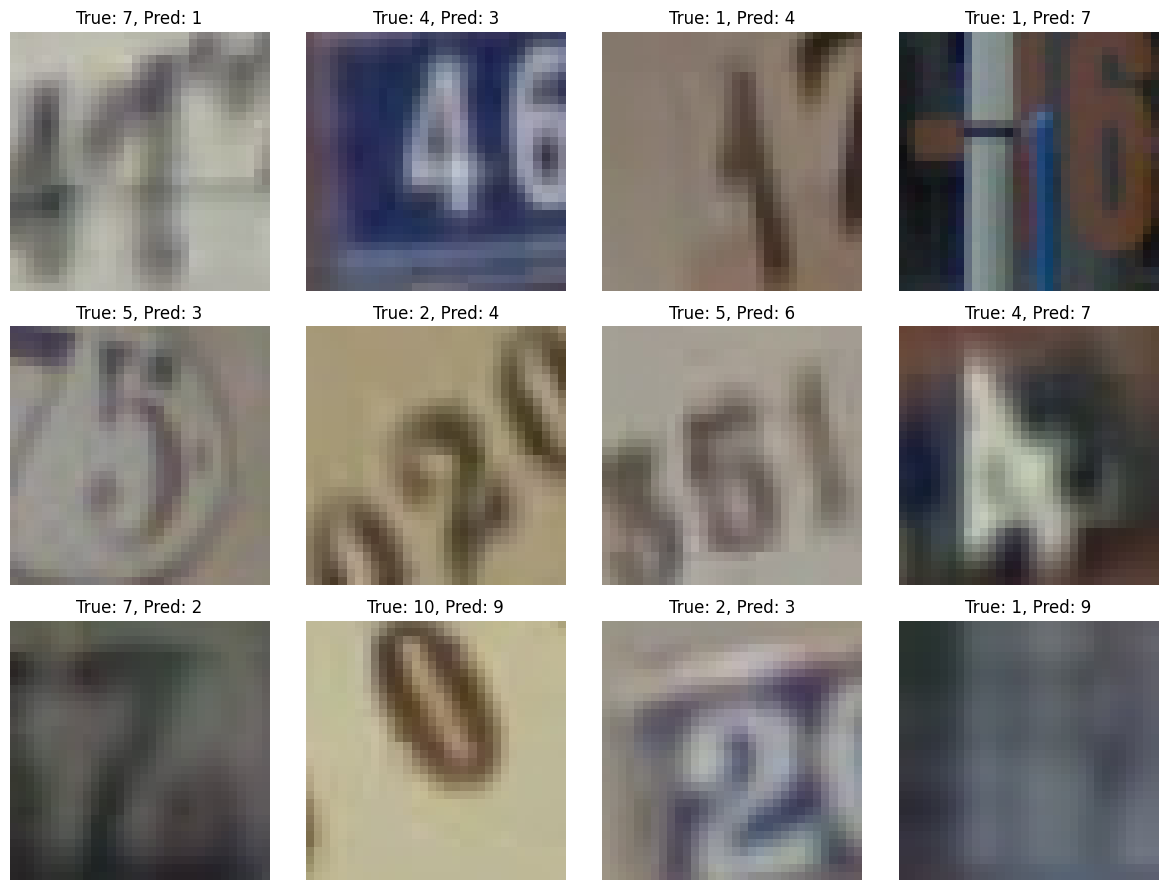

Opinion on Misclassifications:
1. Images look noisy and pixelated, blurry
2. Some misclassifications may stem from similar visual patterns in different classes.
3. We can further improve the model by providing more layers and better learning rate, the adaptative learning rate I think is a very useful and nice feature of the SGD


In [26]:
y_pred = nn.predict(X_test)

# Identify misclassified examples
misclassified_idx = np.where(y_pred != y_test)[0]  # Indices of misclassified samples

# Select the first 12 misclassified samples
misclassified_idx = misclassified_idx[:12]

# Set up the plot
fig, ax = plt.subplots(3, 4, figsize=(12, 9))
ax = ax.flatten()

for i, idx in enumerate(misclassified_idx):
    img = X_test[idx].reshape(32, 32, 3)  # Reshape to 32x32x3 image
    true_label = y_test[idx]
    pred_label = y_pred[idx]
    
    ax[i].imshow(img)
    ax[i].set_title(f"True: {true_label}, Pred: {pred_label}")
    ax[i].axis('off')  # Hide axis for clarity

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print analysis
print("Opinion on Misclassifications:")
print("1. Images look noisy and pixelated, blurry")
print("2. Some misclassifications may stem from similar visual patterns in different classes.")
print("3. We can further improve the model by providing more layers and better learning rate, the adaptative learning rate I think is a very useful and nice feature of the SGD")
